In [103]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

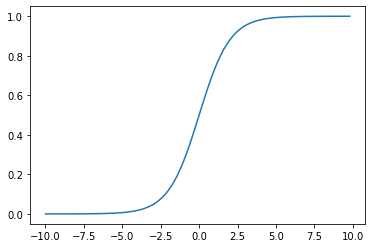

In [2]:
x = np.arange(-10,10,0.2)
y = 1/(1+(np.exp(-x)))
plt.plot(x,y)

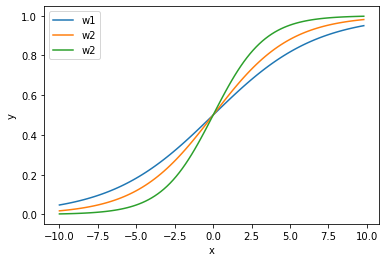

In [3]:
w = [(0.3,'w1'),(0.4,'w2'),(0.6,'w2')]
for a,l in w:
    y = 1/(1+(np.exp(-x*a)))
    plt.plot(x,y, label = l)
    plt.legend(loc=2)
    plt.xlabel('x')
    plt.ylabel('y')
    
    # change in weight changes the slope 

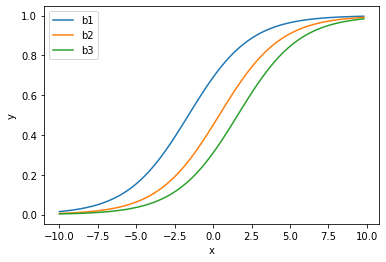

In [4]:
### What if I want the curve to shift, such that the at x=-2.5, I want the output to be 0. i.e. shifting the curver entirely
w =0.5
b = [(-0.8,'b1'),(0.2,'b2'),(0.8,'b3')]
for a,l in b:
    y = 1/(1+(np.exp(-x*w + a)))
    plt.plot(x,y, label = l)
    plt.legend(loc=2)
    plt.xlabel('x')
    plt.ylabel('y')
    
# bias shift the curve

In [80]:
w1 = np.zeros((3,3))
w1[0,:] = [0.2,0.2,0.2] # weight in layer 1
w1[1,:] = [0.4,0.4,0.4] # weight in layer 2]
w1[2,:] = [0.6,0.6,0.6]
# w1 is the input vector to layer 2
w2 = np.zeros((1,3))
w2 = np.array([0.5,0.5,0.5])
# w2 is the input vector to layer 3

In [81]:
b1 = np.array([0.8,0.8,0.8]) #bias to layer 2
b2 = np.array([0.2]) #bias to layer 3

In [82]:
def y(x):
    return (1/(1+(np.exp(-x))))

#### Using for to evaluate Feed Forward

In [83]:
def simple_nn_calc(nlayers, x , w, b):
    for l in range(nlayers-1):
        # If the layer is 0, definitely, the output will be the input values
        if l == 0:
            node_in = x
        else:
            node_in = h
        # set the ouput array as h,the shape of the weight at layer l determines the output of such layer
        h = np.zeros((w[l].shape[0],))
        
        for i in range(w[l].shape[0]):
            f_sum = 0
            # loop through the column of the weight array
            for j in range(w[l].shape[1]):
                f_sum+=w[l][i][j]*node_in[j]         
            # add bias
            f_sum+=b[l][i]
            
            # finally calculate the activation function
            h[i] = y(f_sum)
    return h
        

#### Using matrix to evaluate Feed Forward
![alt text](addendum/matrix_calc.JPG "MATRIX")

In [ ]:
Image(filename = 'addendum/matrix_calc.JPG')

In [95]:
def matrix_nn_calc(nlayers, x , w, b):
    for l in range(nlayers-1):
        # If the layer is 0, definitely, the output will be the input values
        if l == 0:
            node_in = x
        else:
            node_in = h
        # set the ouput array as h,the shape of the weight at layer l determines the output of such layer
        z = w[l].dot(node_in) + b[l]
        h = y(z)
    return h


In [84]:
w = [w1,w2]
b = [b1,b2]
x =[1.5, 2.0, 3.0]

w

[array([[0.2, 0.2, 0.2],
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.6]]),
 array([0.5, 0.5, 0.5])]

In [85]:
b

[array([0.8, 0.8, 0.8]), array([0.2])]

In [86]:
w[0][0][1]

0.2

In [102]:
simple_nn_calc(2,x,w,b)

array([0.89090318, 0.96770454, 0.9909867 ])

In [99]:
matrix_nn_calc(3,x,w,b)

array([0.83545566])

In [91]:
# Using loop is slow, hence it cannot be used

def sole():
    for a in range(3):
        k=1
    

In [92]:
%timeit sole()

1.26 µs ± 3.19 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
